### 6.3 Outlier detection with conformal prediction

Conformal prediction can also be adapted to handle unsupervised outlier detection. 

Here, we have access to a clean dataset X1, . . . , Xn and wish to detect when test points do not come from the same distribution. 

As before, we begin with a heuristic model that tries to identify outliers; a larger score means that the model
judges the point more likely to be an outlier. 

We will then use a variant of conformal prediction to calibrate
it to have statistical guarantees. 

In particular, we will guarantee that it does not return too many false
positives.

Formally, we will construct a function that labels test points as outliers or inliers, T : X → {outlier, inlier},
such that
$$ P(T (X_{test}) = outlier) \leq \alpha $$
where the probability is over $X_{test}$, a fresh sample from the clean-data distribution

In [1]:
from random import gauss
import matplotlib.pyplot as plt 
from math import ceil
from numpy import quantile

In [2]:
X=[gauss(0,1) for i in range(100)]

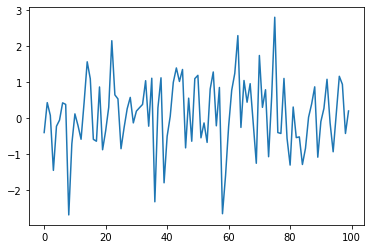

In [3]:
n=len(X)
X
plt.plot(X) 
plt.show() 

The algorithm for achieving is similar to the usual conformal algorithm. We start with a conformal score s : X → R (note
that since we are in the unsupervised setting the score only depends on the features).

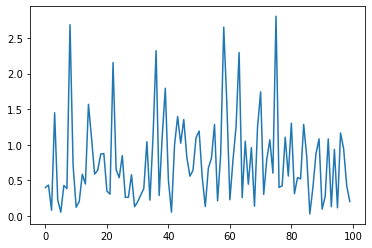

In [4]:
def s(x):
    return [abs(i) for i in x]

s(X)
plt.plot(s(X)) 
plt.show() 

In [14]:
alpha=0.01

quantile_level=ceil((n+1)*(1-alpha))/n
qhat=quantile(s(X),quantile_level)
qhat

2.296068593607191

In [15]:
X_test=[gauss(0,1) for i in range(100)]

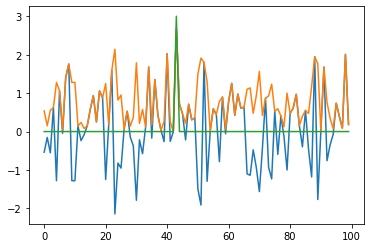

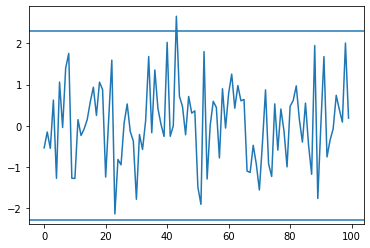

In [16]:
X
plt.plot(X_test) 
plt.plot(s(X_test))
plt.plot((s(X_test)>qhat)*3)
plt.show() 

plt.plot(X_test) 
plt.axhline(qhat)
plt.axhline(-qhat)
plt.show()


In [17]:
sum(s(X_test)>qhat)/len(X_test)

0.01

This construction guarantees error control, as we record next.

#### Proposition 3 (Error control guarantee for outlier detection) 
Suppose $X_1, \dots,X_n, X_{test}$ are an i.i.d. sample from some distribution. Then the set T defined above satisfies the error control property in (13).

As with standard conformal prediction, the score function is very important for the method to perform
well—that is, to be effective at flagging outliers. 

Here, we wish to choose the score function to effectively distinguish the type of outliers that we expect to see in the test data from the clean data. 

The general problem of training models to distinguish outliers is sometimes called anomaly detection, novelty detection,
or one-class classification, and there are good out-of-the box methods for doing this.

-> At this point, I wonder what happens if I define the anomaly in a more interesting way.
For example, a series of constant values, could be an anomaly if I expect somewhat variable (nonconstant) data

In [19]:
def s2(x):
    ahead=[i for i in x[1:]]
    back=[i for i in x[:-1]]
    diff=[1/(abs(ahead[i]-back[i])+0.0001) for i in range(len(ahead))]
    diff=[0]+diff
    return diff

In [31]:
#metto molto basso così prendo solo quelli costanti
alpha=0.01

quantile_level=ceil((n+1)*(1-alpha))/n
qhat=quantile(s2(X),quantile_level)
qhat

51.55654008555797

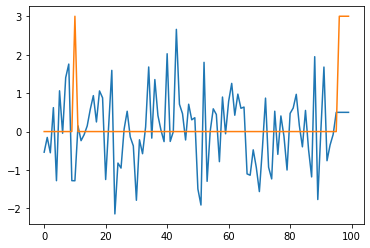

In [32]:
X_test=X_test[:95]+[0.5, 0.5, 0.5, 0.5, 0.5]
plt.plot(X_test) 
#plt.plot(s(X_test))
plt.plot((s2(X_test)>qhat)*3)
plt.show() 

In [22]:
len(s2(X_test))

100

In [23]:
s2(X_test)

[0,
 2.6012406490409345,
 2.504091639070346,
 0.8517026198695516,
 0.526248524687675,
 0.4275981734425018,
 0.9050627214002781,
 0.6912443477930673,
 2.8320973863841137,
 0.32972584650106634,
 400.6003430547523,
 0.7005124764711571,
 2.6004751908611357,
 6.368864156512226,
 4.396815266285851,
 2.313934577036172,
 2.814481578759063,
 1.460500478644137,
 1.2387489912338063,
 5.564054945231785,
 0.4704582251739924,
 0.7002731728425565,
 0.7081586242503759,
 0.2677572043744781,
 0.7558906651958506,
 7.649486639792357,
 0.9866651789275802,
 2.149533617124328,
 1.4962881600220752,
 4.2969678105908296,
 0.7067349982505473,
 0.6354402212324808,
 2.7580781786673523,
 1.4327853298366304,
 0.6417222370899494,
 0.5403367339071214,
 0.6565080113388474,
 1.0705862878402763,
 2.5992086697325787,
 3.3877508262907514,
 0.4374974284473851,
 0.4383791600627677,
 3.949809090282028,
 0.3755806808440361,
 0.5136872612602239,
 4.037652611491193,
 1.464030539460345,
 1.0754759216213383,
 2.4642830043713997,
 

Similarly, a hidden change in measurement could be interpreted as anomaly in certain contexts

In [33]:
def s3(x):
    ahead=[i for i in x[1:]]
    back=[i for i in x[:-1]]
    diff=[abs(ahead[i]-back[i]) for i in range(len(ahead))]
    diff=[0]+diff
    return diff

In [34]:
#metto molto basso così prendo solo quelli evidenti
alpha=0.01

quantile_level=ceil((n+1)*(1-alpha))/n
qhat=quantile(s3(X),quantile_level)
qhat

3.506718152330347

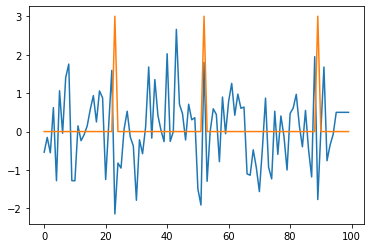

In [36]:
X_test=X_test[:95]+[0.5, 0.5, 0.5, 0.5, 0.5]
plt.plot(X_test) 
#plt.plot(s(X_test))
plt.plot((s3(X_test)>qhat)*3)
plt.show() 

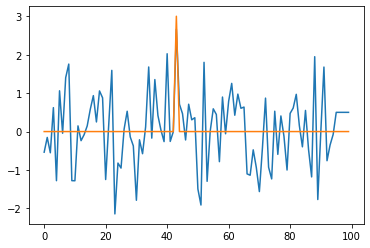

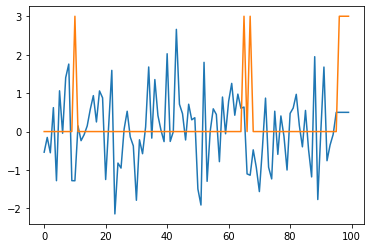

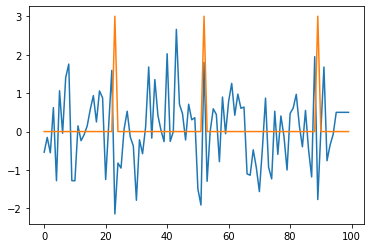

In [39]:
alpha=0.03

quantile_level=ceil((n+1)*(1-alpha))/n
qhat=quantile(s(X),quantile_level)
qhat2=quantile(s2(X),quantile_level)
qhat3=quantile(s3(X),quantile_level)


plt.plot(X_test) 
#plt.plot(s(X_test))
plt.plot((s(X_test)>qhat)*3)
plt.show() 

plt.plot(X_test) 
#plt.plot(s(X_test))
plt.plot((s2(X_test)>qhat2)*3)
plt.show() 

plt.plot(X_test) 
#plt.plot(s(X_test))
plt.plot((s3(X_test)>qhat3)*3)
plt.show() 

Last thing.
Given an alpha, how many anomalies do I observe, if I draw many different test sets? Is the conformal procedure reliable

In [62]:
alpha=0.01

n_test=500

quantile_level=ceil((n_test+1)*(1-alpha))/n_test
qhat=quantile(s(X),quantile_level)
qhat2=quantile(s2(X),quantile_level)
qhat3=quantile(s3(X),quantile_level)

count=[]
count2=[]
count3=[]
for i in range(10000):
    X_test=[gauss(0,1) for i in range(n_test)]

    count+=[sum(s(X_test)>qhat)/n_test]
    count2+=[sum(s2(X_test)>qhat2)/n_test]
    count3+=[sum(s3(X_test)>qhat3)/n_test]


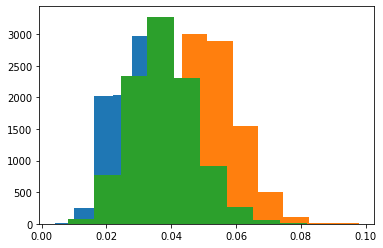

0.02864000000000032
0.051544799999999474
0.03783019999999958


In [63]:
plt.hist(count)
plt.hist(count2)
plt.hist(count3)
plt.show()
print(sum(count)/len(count))
print(sum(count2)/len(count2))
print(sum(count3)/len(count3))

very close to alpha indeed.

In [64]:
count

[0.018,
 0.038,
 0.018,
 0.018,
 0.04,
 0.036,
 0.02,
 0.022,
 0.034,
 0.036,
 0.034,
 0.024,
 0.026,
 0.026,
 0.028,
 0.032,
 0.04,
 0.02,
 0.046,
 0.03,
 0.036,
 0.018,
 0.034,
 0.026,
 0.026,
 0.038,
 0.032,
 0.016,
 0.03,
 0.026,
 0.032,
 0.026,
 0.024,
 0.034,
 0.02,
 0.028,
 0.036,
 0.02,
 0.022,
 0.032,
 0.028,
 0.022,
 0.032,
 0.022,
 0.038,
 0.024,
 0.028,
 0.026,
 0.03,
 0.034,
 0.022,
 0.024,
 0.034,
 0.042,
 0.026,
 0.028,
 0.026,
 0.028,
 0.03,
 0.022,
 0.034,
 0.032,
 0.034,
 0.026,
 0.018,
 0.022,
 0.032,
 0.03,
 0.028,
 0.03,
 0.026,
 0.042,
 0.026,
 0.026,
 0.034,
 0.034,
 0.034,
 0.01,
 0.038,
 0.034,
 0.018,
 0.028,
 0.02,
 0.024,
 0.032,
 0.026,
 0.042,
 0.036,
 0.03,
 0.036,
 0.024,
 0.036,
 0.024,
 0.028,
 0.036,
 0.022,
 0.032,
 0.02,
 0.03,
 0.028,
 0.032,
 0.026,
 0.032,
 0.038,
 0.032,
 0.032,
 0.03,
 0.022,
 0.042,
 0.034,
 0.024,
 0.036,
 0.034,
 0.028,
 0.024,
 0.034,
 0.024,
 0.016,
 0.026,
 0.024,
 0.024,
 0.034,
 0.02,
 0.04,
 0.03,
 0.022,
 0.028,
 0.03